# Data Wrangling and Analysis of Dog Ratings
## By Damilola Esan
> A comprehensive process of data wrangling and analysis centered around dog ratings and related information. The primary task involved gathering data from varied sources, with a significant focus on leveraging the Twitter API. The subsequent steps encompassed assessing data quality, tidying up inconsistencies, and refining data types.
>
>Notably, the Twitter API played a pivotal role in augmenting the dataset. By extracting additional data, it enriched the analysis potential. The cleaning process entailed meticulous data curation, including the exclusion of rows with inaccurate image predictions and irrelevant entries.
>
>Throughout this notebook, the intricate dance of data wrangling, with a spotlight on Twitter API integration and data cleansing, unfolds. This effort culminates in insightful analysis and impactful visualization, offering a holistic narrative about the dataset.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
import tweepy
import json
import time

## Data Gathering

In [2]:
# Load the flat file provided ('twitter-archive-enhanced.csv') into a dataframe
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Request the second file from a url and load into a dataframe
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
download = requests.get(url).content
image_predictions = pd.read_csv(io.StringIO(download.decode('utf-8')), sep = '\t')

In [4]:
%%script false --no-raise-error
# Prevent the cell from running to optimize the notebook since the required data has been downloaded

# Collect the third data set by quering Twitter API using Tweepy and saving it in a text file
# Define Twitter API access and initiate the API (Input your Twitter API access)
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, parser = tweepy.parsers.JSONParser())

# Retrieve the tweet for each id and append to an empty list
tweets = []
for tweet_id in tweet_archive.tweet_id:
    start = time.time()
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweets.append(tweet)
        print(f'Successfully retrieved tweet with ID {tweet_id}')
    except Exception as e:
        print(str(tweet_id) +  ': ' + str(e))
    end = time.time()
    print('Time Spent: ' + str(end - start))

# Save the list of tweets in a text file line by line
with open('tweet_json.txt', 'w') as file:
    for tweet in tweets:
        file.write(json.dumps(tweet) + '\n')

Couldn't find program: 'false'


In [5]:
# Extract the retweet count and favorite count for each tweet downloaded into a pandas dataframe
tweets_data = []
# Open the text file to read its content
with open('tweet_json.txt', 'r') as file:
    # Read the tweets from the text file, one line at a time  
    for line in file:
        tweet_json = json.loads(line)
        tweet_id = tweet_json['id']
        retweet_count = tweet_json['retweet_count']
        favorite_count = tweet_json['favorite_count']
        # Load the retweet and favorite count from the line of json_text and add it to the list
        tweets_data.append({'tweet_id': tweet_id,
                      'retweet_count': retweet_count,
                      'favorite_count': favorite_count})

# Create DataFrame from the list of dictionaries
tweet_extra = pd.DataFrame(tweets_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data

### Visual Assessment

In [6]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


 - Missing values
 - name column has an odd entry ('a')
 - Null values recorded as 'None'
 - Inconsistent denominator (discovered using `Excel`)

In [7]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


 - Most confident predicted breed not highlighted
 - Most confident predictions are false dog breeds

In [8]:
tweet_extra

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6877,32897
1,892177421306343426,5179,28431
2,891815181378084864,3422,21371
3,891689557279858688,7086,35865
4,891327558926688256,7597,34310
...,...,...,...
2320,666049248165822465,35,85
2321,666044226329800704,113,242
2322,666033412701032449,35,98
2323,666029285002620928,39,111


### Programmatic Assessment

In [9]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
tweet_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [12]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The numerator and denominator include zero(0) and irregular values, we will check further for this later

In [13]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
# Checking for duplicated rows
tweet_archive.duplicated().sum(), image_predictions.duplicated().sum(), tweet_extra.duplicated().sum()

(0, 0, 0)

In [15]:
# Checking for the number of null values in the tweet_archive table
tweet_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
# Checking for the inconsistencies in the denominator
tweet_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [17]:
# Checking further for the inconsistencies in the denominator
tweet_archive.query('rating_denominator != 10') \
[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']] \
.style.set_properties(subset='text', width='200px')

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297344,@docmisterio account started on 11/15/15,11,15
433,820690176645140480,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer. Keep Sam smiling by clicking and sharing this link: https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256960,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652800,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [18]:
# Checking for [75, 27, 26, 0] values in the numerator
tweet_archive.query('rating_numerator == 0') \
[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']] \
.style.set_properties(subset='text', width='200px')

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116544,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
1016,746906459439529984,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10


In [19]:
# Checking for the odd character ('a') in the name column
tweet_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [20]:
# Checking further for the odd character ('a') in the name column
tweet_archive.query('name == "a"') \
[['tweet_id', 'text', 'name']] \
.style.set_properties(subset='text', width='200px')

,tweet_id,text,name
56,881536004380872704,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af (IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
649,792913359805018112,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
801,772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
1002,747885874273214464,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a
1017,746872823977771008,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,a
1049,743222593470234624,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a
1193,717537687239008256,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,a
1207,715733265223708672,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,a
1340,704859558691414016,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,a


In [21]:
# Checking for the values entered as 'None' in the name column
tweet_archive.query('name == "None"') \
[['tweet_id', 'text', 'name']] \
.style.set_properties(subset='text', width='200px')

,tweet_id,text,name
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None
12,889665388333682688,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,None
24,887343217045368832,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,None
25,887101392804085760,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,None
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,None
32,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,None
35,885518971528720384,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,None
37,885167619883638784,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,None
41,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",None


In [22]:
tweet_archive['doggo'].value_counts(), '-------', tweet_archive['floofer'].value_counts(), '-------', \
tweet_archive['pupper'].value_counts(), '-------', tweet_archive['puppo'].value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64,
 '-------',
 None       2346
 floofer      10
 Name: floofer, dtype: int64,
 '-------',
 None      2099
 pupper     257
 Name: pupper, dtype: int64,
 '-------',
 None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [23]:
# Defining a function to return false predictions
def false_predictions(df):
    # Getting the confidence levels of the predictions
    conf_level = [df['p1_conf'], df['p2_conf'], df['p3_conf']]
    # Getting the index of the prediction with the highest confidence level
    highest_conf = conf_level.index(max(conf_level))
    # Getting the p#_dog value for the highest_conf
    if highest_conf == 0:
        dog_breed = df['p1_dog']
    elif highest_conf == 1:
        dog_breed = df['p2_dog']
    else:
        dog_breed = df['p3_dog']
    # Return true if the highest confidence prediction is a false dog breed and false otherwise
    if not dog_breed:
        return True
    else:
        return False

# Passing the function on the image_predictions table
image_predictions[image_predictions.apply(false_predictions, axis = 1)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [24]:
all_columns = pd.Series(list(tweet_archive) + list(image_predictions) + list(tweet_extra))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality issues
##### `tweet_archive` table
1. Tweets include replies and retweets

2. Nulls represented as None in dog name and dog stages columns

-4. Name column contains odd characters ('a')

5. Missing values (name, expanded url and dog stage)

6. rating_numerator of 0 and only the figure after the decimals were recorded for floats (75, 27, 26)

7. Inconsistent rating_denominator

8. Source column values are wrapped in html syntax

9. Errorneous datatype (timestamp)

-11. Not all tweets have image predictions **- Iterated assessment (after excluding images with false predictions)**

##### `image_predictions` table
-3. Innconsistent case use of dog predictions (upper and lower case)

-10. False predictions (most confident/all prediction has a false breed of dog)

### Tidiness issues
1. One variable (`dog stage`) split into four columns (doggo, floofer, pupper, puppo)

2. `tweet_extra` should be part of `tweet_archive`

3. Most confident prediction not highlighted in the `image_predictions` table

4. Redundant columns in `tweet_archive` table (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) **- Iterated assessment (after excluding replies and retweets)**

5. Redundant columns in `image_predictions` table (rating_denominator) **- Iterated assessment (after scaling all ratings to a denominator of 10)**

6. Add the most confident prediction column from the image_prediictions to the tweet_archive

## Cleaning Data

In [25]:
# Make copies of original pieces of data
tweet_archive_clean = tweet_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_extra_clean = tweet_extra.copy()

### Quality

### Issue #1: Tweets include replies and retweets

#### Define: 
 - Remove all rows where `in_reply_to_status_id` and `retweeted_status_id` columns contains non-null values

#### Code

In [26]:
tweet_archive_clean = tweet_archive_clean[(tweet_archive_clean['in_reply_to_status_id'].isnull() & \
                                           tweet_archive_clean['retweeted_status_id'].isnull())]

#### Test

In [27]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2: Nulls represented as 'None' in dog name and dog stages columns

#### Define: 
 - Replace all 'None' values in the `name`, `doggo`, `floofer`, `pupper` and `puppo` columns to null values using the `.replace()` function

#### Code

In [28]:
none_columns = ['name', 'doggo', 'floofer', 'pupper', 'puppo']
tweet_archive_clean[none_columns] = tweet_archive_clean[none_columns].replace('None', np.nan)

#### Test

In [29]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        1494 non-null   object 
 13  doggo                       83 no

### Issue #3: Innconsistent case use of dog predictions (upper and lower case)

#### Define: 
- Replace underscore with space and capitalize each word

#### Code

In [30]:
predictions = ['p1', 'p2', 'p3']
image_predictions_clean[predictions] = image_predictions_clean[predictions].replace('_', ' ', regex=True)
image_predictions_clean[predictions] = image_predictions_clean[predictions].apply(lambda x: x.str.title())

#### Test

In [31]:
image_predictions_clean[predictions].value_counts()

p1                p2                  p3             
Malamute          Siberian Husky      Eskimo Dog         17
Golden Retriever  Labrador Retriever  Kuvasz             16
Pembroke          Cardigan            Chihuahua          15
                                      Basenji            11
Siberian Husky    Eskimo Dog          Malamute            9
                                                         ..
German Shepherd   Malinois            Wallaby             1
                                      Irish Setter        1
                  Leonberg            Bloodhound          1
                  Kelpie              Red Wolf            1
Zebra             Tiger               Prairie Chicken     1
Length: 1742, dtype: int64

### Tidiness

### Issue #4: Redundant columns in tweet_archive table (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Define: 
- Drop these columns from the tweet_archive_clean table

#### Code

In [32]:
drop_cols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', \
             'retweeted_status_user_id', 'retweeted_status_timestamp']
tweet_archive_clean = tweet_archive_clean.drop(drop_cols, axis = 1)

#### Test

In [33]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1494 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              230 non-null    object
 11  puppo               24 non-null     object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #1: One variable (`dog stage`) split into four columns (doggo, floofer, pupper, puppo)

#### Define: 
 - Extract the doggo, floofer, pupper and puppo columns values into a single column `dog_stage` using the `.combine_first()` function and drop the previous columns

#### Code

In [34]:
tweet_archive_clean['dog_stage'] = tweet_archive_clean.doggo.combine_first(tweet_archive_clean.floofer) \
                                    .combine_first(tweet_archive_clean.pupper) \
                                    .combine_first(tweet_archive_clean.puppo)
drop_cols = ['doggo', 'floofer', 'pupper', 'puppo']
tweet_archive_clean = tweet_archive_clean.drop(drop_cols, axis = 1)

#### Test

In [35]:
tweet_archive_clean.dog_stage.value_counts()

pupper     221
doggo       83
puppo       23
floofer      9
Name: dog_stage, dtype: int64

The occurence of pupper, puppo and floofer reduced because there were situations where an entry had more than one dog stage

In [36]:
tweet_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
511,811985624773361665,2016-12-22 17:23:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ted. He accidentally opened the f...,https://twitter.com/dog_rates/status/811985624...,11,10,Ted,NaN
383,827199976799354881,2017-02-02 17:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wins every game of chess h...,https://twitter.com/dog_rates/status/827199976...,13,10,Charlie,NaN
1066,740699697422163968,2016-06-09 00:19:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He only mowed half the yard. 8/1...,https://twitter.com/dog_rates/status/740699697...,8,10,Chip,NaN
1096,736365877722001409,2016-05-28 01:18:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's extremely impatient. 11/10 ...,https://twitter.com/dog_rates/status/736365877...,11,10,Rory,pupper
2273,667470559035432960,2015-11-19 22:32:36 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,a,NaN


In [37]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1494 non-null   object
 8   dog_stage           336 non-null    object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


### Issue #2: tweet_extra should be part of the tweet_archive table

#### Define: 
 - Merge the tweet_extra table to the tweet_archive table, joining on tweet_id

#### Code

In [38]:
tweet_archive_clean = pd.merge(tweet_archive_clean, tweet_extra_clean,
                            on=['tweet_id'], how='inner')

Using the inner join because while extracting the tweets from the API, some tweets seems to have been deleted and is no longer valid

#### Test

In [39]:
tweet_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,6877,32897
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5179,28431
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3422,21371
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7086,35865
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7597,34310


In [40]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2088
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2089 non-null   int64 
 1   timestamp           2089 non-null   object
 2   source              2089 non-null   object
 3   text                2089 non-null   object
 4   expanded_urls       2086 non-null   object
 5   rating_numerator    2089 non-null   int64 
 6   rating_denominator  2089 non-null   int64 
 7   name                1487 non-null   object
 8   dog_stage           335 non-null    object
 9   retweet_count       2089 non-null   int64 
 10  favorite_count      2089 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 195.8+ KB


### Issue #3: Most confident prediction not highlighted in the image_predictions table

#### Define: 
 - Create a column that shows the prediction with the highest confidence level

#### Code

In [41]:
# Creating a column to store the most confident prediction
image_predictions_clean['p_most_conf'] = ''

for i, row in image_predictions_clean.iterrows():
    # Getting the confidence level for each row
    most_confident = pd.to_numeric(row[['p1_conf', 'p2_conf', 'p3_conf']]).idxmax()
    # Getting the p# value for the highest_conf
    if most_confident == 'p1_conf':
        p_most_conf = row['p1']
    elif most_confident == 'p2_conf':
        p_most_conf = row['p2']
    else :
        p_most_conf = row['p3']
    # Assigning the most confident prediction to the new column
    image_predictions_clean.at[i, 'p_most_conf'] = p_most_conf

#### Test

In [42]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p_most_conf
980,707315916783140866,https://pbs.twimg.com/media/CdDkEkHWwAAAeUJ.jpg,2,Bernese Mountain Dog,0.979235,True,Shetland Sheepdog,0.011037,True,Appenzeller,0.003971,True,Bernese Mountain Dog
1626,804026241225523202,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1,Web Site,0.492709,False,Envelope,0.050566,False,Guillotine,0.015297,False,Web Site
687,684122891630342144,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,1,Cheetah,0.822193,False,Arabian Camel,0.046976,False,Jaguar,0.025785,False,Cheetah
1912,853760880890318849,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,Miniature Pinscher,0.292519,True,Chihuahua,0.120946,True,Rottweiler,0.119490,True,Miniature Pinscher
1610,801167903437357056,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,Cocker Spaniel,0.740220,True,Dandie Dinmont,0.061604,True,English Setter,0.041331,True,Cocker Spaniel
307,671533943490011136,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1,Hen,0.556524,False,Cock,0.442033,False,Black Swan,0.001181,False,Hen
437,674416750885273600,https://pbs.twimg.com/media/CVwCdCFW4AUHY4D.jpg,1,Chihuahua,0.287201,True,Boston Bull,0.250920,True,Whippet,0.141012,True,Chihuahua
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,Chihuahua
573,678424312106393600,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,Maltese Dog,0.759945,True,Toy Poodle,0.101194,True,Shih-Tzu,0.056037,True,Maltese Dog
832,693647888581312512,https://pbs.twimg.com/media/CaBVE80WAAA8sGk.jpg,1,Washbasin,0.272451,False,Doormat,0.165871,False,Bathtub,0.066368,False,Washbasin


### Quality

### Issue #4: Name column contains odd characters ('a')

It was observed that most names with the value 'a' are from tweets that did not follow the text structure when inputing the name of the dog. For example, the rows with actual names goes like 'This is Luna' while most with 'a' goes like 'This is a purebred Bacardi named Octaviath'.

Probably who collected the data only extracted the word after 'This is'. So lets try to get the words after 'named' and replace the rest with 'Unknown'

#### Define: 
 - Extract the word after 'named' in the text and replace where the values are  'a'
 - Replace the ones we cant get the names with 'unknown'

#### Code

In [43]:
for i, row in tweet_archive_clean.iterrows():
    if row['name'] == 'a':
        # Splitting the text in the column
        text = row['text'].split()
        try:
            # Getting the next word after 'named'
            name = text[text.index('named') + 1].strip('.')
            # Assigning the name to the that specific row
            tweet_archive_clean.at[i, 'name'] = name
        except Exception:
            pass

#### Test

In [44]:
tweet_archive_clean[tweet_archive_clean['text'].str.contains('named')] \
[['tweet_id', 'text', 'name']] \
.style.set_properties(subset='text', width='200px')

,tweet_id,text,name
1602,675706639471788032,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,Wylie
1696,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,Kip
1775,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,Jacob
1805,671147085991960576,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,Rufus
1855,670427002554466304,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,Spork
1864,670361874861563904,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,Cherokee
1867,670303360680108032,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,Hemry
1885,669923323644657664,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,Alphred
1899,669564461267722240,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,Alfredo
1904,669363888236994560,Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m,nan


In [45]:
tweet_archive_clean.name.value_counts()

a             36
Cooper        10
Lucy          10
Oliver        10
Charlie       10
              ..
Lilli          1
Boston         1
Brandonald     1
Corey          1
Christoper     1
Name: name, Length: 968, dtype: int64

In [46]:
tweet_archive_clean.query('name == "a"') \
[['tweet_id', 'text', 'name']] \
.style.set_properties(subset='text', width='200px')

,tweet_id,text,name
51,881536004380872704,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af (IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
490,792913359805018112,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
611,772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
786,747885874273214464,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a
788,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a
798,746872823977771008,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,a
827,743222593470234624,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a
969,717537687239008256,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,a
983,715733265223708672,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,a
1112,704859558691414016,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,a


It was observed that the remaning name 'a' are ratings that does not include the dog name, we can then replace those names with 'unknown' 

#### Code

In [47]:
tweet_archive_clean['name'] = tweet_archive_clean['name'].replace('a', 'unknown')

#### Test

In [48]:
tweet_archive_clean.name.value_counts()

unknown       36
Cooper        10
Lucy          10
Oliver        10
Charlie       10
              ..
Lilli          1
Boston         1
Brandonald     1
Corey          1
Christoper     1
Name: name, Length: 968, dtype: int64

### Issue #5: Missing values (name, expanded_urls and dog_stage)

#### Define: 
 - Fill the missing values of the columns with 'unknown'

#### Code

In [49]:
null_cols = ['expanded_urls', 'name', 'dog_stage']
tweet_archive_clean[null_cols] = tweet_archive_clean[null_cols].fillna('unknown')

#### Test

In [50]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2088
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2089 non-null   int64 
 1   timestamp           2089 non-null   object
 2   source              2089 non-null   object
 3   text                2089 non-null   object
 4   expanded_urls       2089 non-null   object
 5   rating_numerator    2089 non-null   int64 
 6   rating_denominator  2089 non-null   int64 
 7   name                2089 non-null   object
 8   dog_stage           2089 non-null   object
 9   retweet_count       2089 non-null   int64 
 10  favorite_count      2089 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 260.4+ KB


### Issue #6: rating_numerator of 0 and only the figure after the decimals were recorded for floats (75, 27, 26)

Both entries with zero(0) rating numerator are not tweets about dog rating and cannot be classified as original dog rating (one is a tweet reply which has been dropped with other replies, so we can drop the other)

#### Define:
 - Remove rows with numerator of 0
 - Extract the complete float for when numerators are 75, 27 and 26, then convert to integers

#### Code

In [51]:
tweet_archive_clean = tweet_archive_clean.query('rating_numerator != 0')

In [52]:
# Defining the denominator values of the rows 
clause = [75, 27, 26]

for i, row in tweet_archive_clean.iterrows():
    if row['rating_numerator'] in clause:
        # Splitting the text in the column by the occurrence of '/' and...
        # ...then split the result by space ' ', then extract the last and first value
        numerator = row['text'].split('/')[0].split()[-1]
        denominator = row['text'].split('/')[1].split()[0]
        # Assigning the values to that specific row
        tweet_archive_clean.at[i, 'rating_numerator'] = int(round(float(numerator)))
        tweet_archive_clean.at[i, 'rating_denominator'] = int(denominator)

#### Test

In [53]:
tweet_archive_clean.query('rating_numerator == 0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [54]:
tweet_archive_clean[tweet_archive_clean['text'].str.contains('9.75')] \
[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']] \
.style.set_properties(subset='text', width='200px')

,tweet_id,text,rating_numerator,rating_denominator
524,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10,10


In [55]:
tweet_archive_clean[tweet_archive_clean['text'].str.contains('11.27')] \
[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']] \
.style.set_properties(subset='text', width='200px')

,tweet_id,text,rating_numerator,rating_denominator
581,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11,10


### Issue #7: Inconsistent rating_denominator

As observed from the text where rating_denominator is not equal to **10**, it was noticed that most cells with irregular denominators are ratings of multiple dogs rated together and also an error from extracting the ratings from the text (some text contains items in the rating format 'XX/XX') while the rest are not original dog ratings.
 - Tweets where the numerator and denominator are **11,15** and **24,7** respectively are not dog ratings, so this rows can be dropped
 - Tweets where the denominators are **11,0** and **2** contains items in the rating format **'XX/XX'**, so we can extract the second occurence of **'/'**
 - Others are tweets where multiple dogs were rated together, we can rescale the rating to a denominator of 10

#### Define:
 - Drop the rows where the numerator and denominator are 11,15 and 24,7 respectively
 - Extract the second occurence of '/' where the denominators are 11, 0 and 2
 - Rescale the numerator and denominator, by scaling the denominator to 10

#### Code

In [56]:
tweet_archive_clean = tweet_archive_clean.query('rating_denominator != 15')

tweet_archive_clean = tweet_archive_clean.query('rating_denominator != 7')

In [57]:
# Defining the denominator values of the rows 
clause = [11, 0, 2]

for i, row in tweet_archive_clean.iterrows():
    if row['rating_denominator'] in clause:
        # Splitting the text in the column by the second occurrence of '/' and...
        # ...then split the result by space ' ', then extract the last and first value
        numerator = row['text'].split('/', 2)[1].split()[-1]
        denominator = row['text'].split('/', 2)[2].split()[0].strip('.')
        # Assigning the values to that specific row
        tweet_archive_clean.at[i, 'rating_numerator'] = int(numerator)
        tweet_archive_clean.at[i, 'rating_denominator'] = int(denominator)

In [58]:
for i, row in tweet_archive_clean.iterrows():
    if row['rating_denominator'] > 10:
        # Getting the scale by dividing the denominator by 10
        scale = row['rating_denominator']/10
        # Using the scale to normalize both the numerator and denominator
        numerator = row['rating_numerator']/scale
        denominator = row['rating_denominator']/scale
        # Assigning the values to that specific row
        tweet_archive_clean.at[i, 'rating_numerator'] = int(numerator)
        tweet_archive_clean.at[i, 'rating_denominator'] = int(denominator)

#### Test

In [59]:
tweet_archive_clean.query('rating_denominator == 15')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [60]:
tweet_archive_clean[tweet_archive_clean['text'].str.contains('9/11')] \
[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']] \
.style.set_properties(subset='text', width='200px')

,tweet_id,text,rating_numerator,rating_denominator
846,740373189193256960,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10


In [61]:
tweet_archive_clean[tweet_archive_clean['text'].str.contains('88/80')] \
[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']] \
.style.set_properties(subset='text', width='200px')

,tweet_id,text,rating_numerator,rating_denominator
1594,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,11,10


In [62]:
tweet_archive_clean.rating_denominator.value_counts()

10    2087
Name: rating_denominator, dtype: int64

Since we now only have a single value in rating_denominator, we can drop the column and rename the rating_numerator column to just 'rating'

### Tidiness

### Issue #5: Redundant columns in image_predictions table (rating_denominator)

#### Define: 
- Drop the column from the image_predictions_clean table
- Rename rating_denominator as 'rating'

#### Code

In [63]:
tweet_archive_clean = tweet_archive_clean.drop('rating_denominator', axis = 1)

In [64]:
tweet_archive_clean = tweet_archive_clean.rename(columns={'rating_numerator':'rating'})

#### Test

In [65]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2088
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2087 non-null   int64 
 1   timestamp       2087 non-null   object
 2   source          2087 non-null   object
 3   text            2087 non-null   object
 4   expanded_urls   2087 non-null   object
 5   rating          2087 non-null   int64 
 6   name            2087 non-null   object
 7   dog_stage       2087 non-null   object
 8   retweet_count   2087 non-null   int64 
 9   favorite_count  2087 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 243.9+ KB


### Quality

### Issue #8: Source column values are wrapped in html syntax

#### Define:
 - Extract the items from the html syntax
 - Replace the extracts with more definitive terms

#### Code

In [66]:
tweet_archive_clean['source'] = tweet_archive_clean['source'].str.extract(r'\>(.*)\<', expand=False)

In [67]:
tweet_archive_clean['source'] = tweet_archive_clean['source'].replace({'Twitter for iPhone':'iPhone', \
                                                                       'Vine - Make a Scene':'Vine', \
                                                                       'Twitter Web Client':'Web'})

#### Test

In [68]:
tweet_archive_clean.source.value_counts()

iPhone       1955
Vine           91
Web            31
TweetDeck      10
Name: source, dtype: int64

### Issue #9: Errorneous datatype (timestamp)

#### Define:
 - Rename the column to date
 - Convert the timestamp column datatype to datetime and keep the date only

#### Code

In [69]:
tweet_archive_clean = tweet_archive_clean.rename(columns={'timestamp':'date'})

In [70]:
tweet_archive_clean['date'] = pd.to_datetime(tweet_archive_clean['date'])
tweet_archive_clean['date'] = tweet_archive_clean['date'].dt.date
# Noticed that the column datatype changed to object, so it had to be converted back to datetime
tweet_archive_clean['date'] = pd.to_datetime(tweet_archive_clean['date'])

#### Test

In [71]:
tweet_archive_clean.date.sample(5)

1816   2015-11-29
1773   2015-12-01
1980   2015-11-21
524    2016-10-13
932    2016-04-26
Name: date, dtype: datetime64[ns]

In [72]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2088
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2087 non-null   int64         
 1   date            2087 non-null   datetime64[ns]
 2   source          2087 non-null   object        
 3   text            2087 non-null   object        
 4   expanded_urls   2087 non-null   object        
 5   rating          2087 non-null   int64         
 6   name            2087 non-null   object        
 7   dog_stage       2087 non-null   object        
 8   retweet_count   2087 non-null   int64         
 9   favorite_count  2087 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 243.9+ KB


### Issue #10: False predictions (most confident/all prediction has a false breed of dog)

Since the project is based on original ratings that have images, the image predictions are vital and as such, we will exclude all images with false predictions. The false predictions are over 500 entries of data which is a large sum but nonetheless, it is useless for any form of analysis. The best option would have been to run the images through another neural network but that is beyond my scope at the moment.

#### Define:
 - Drop rows where the image predictions are False (Recall that we defined a function earlier to determine false predictions)

#### Code

In [73]:
image_predictions_clean = image_predictions_clean[~image_predictions_clean.apply(false_predictions, axis = 1)]

#### Test

In [74]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     1532 non-null   int64  
 1   jpg_url      1532 non-null   object 
 2   img_num      1532 non-null   int64  
 3   p1           1532 non-null   object 
 4   p1_conf      1532 non-null   float64
 5   p1_dog       1532 non-null   bool   
 6   p2           1532 non-null   object 
 7   p2_conf      1532 non-null   float64
 8   p2_dog       1532 non-null   bool   
 9   p3           1532 non-null   object 
 10  p3_conf      1532 non-null   float64
 11  p3_dog       1532 non-null   bool   
 12  p_most_conf  1532 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 136.1+ KB


### Issue #11: Not all tweets have image predictions

#### Define:
 - keep only tweets where the tweet_id matches the tweet_id in the image_predictions table

#### Code

In [75]:
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.tweet_id.isin \
                                          (image_predictions_clean.tweet_id)]

#### Test

In [76]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 1 to 2088
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1454 non-null   int64         
 1   date            1454 non-null   datetime64[ns]
 2   source          1454 non-null   object        
 3   text            1454 non-null   object        
 4   expanded_urls   1454 non-null   object        
 5   rating          1454 non-null   int64         
 6   name            1454 non-null   object        
 7   dog_stage       1454 non-null   object        
 8   retweet_count   1454 non-null   int64         
 9   favorite_count  1454 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 125.0+ KB


### Tidiness

### Issue #6: Add the most confident prediction column from the image_prediictions to the tweet_archive

#### Define: 
- Merge the most confident ppredictions to the tweet_archive

#### Code

In [77]:
most_confident_p = image_predictions_clean[['tweet_id', 'p_most_conf']]
tweet_archive_clean = pd.merge(tweet_archive_clean, most_confident_p, on = 'tweet_id', how = 'left')

#### Test

In [78]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1453
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1454 non-null   int64         
 1   date            1454 non-null   datetime64[ns]
 2   source          1454 non-null   object        
 3   text            1454 non-null   object        
 4   expanded_urls   1454 non-null   object        
 5   rating          1454 non-null   int64         
 6   name            1454 non-null   object        
 7   dog_stage       1454 non-null   object        
 8   retweet_count   1454 non-null   int64         
 9   favorite_count  1454 non-null   int64         
 10  p_most_conf     1454 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 136.3+ KB


## Storing Data

In [79]:
tweet_archive_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

### 1. Most featured/popular breed of dog

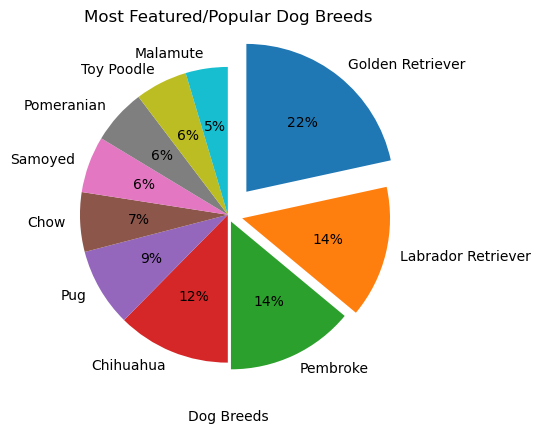

In [80]:
most_pop = tweet_archive_clean.p_most_conf.value_counts().head(10)
# Plotting the result on a chart
plt.pie(most_pop.values, labels = most_pop.index, startangle = 90, counterclock = False,
        autopct = '%1.0f%%', explode = (0.2,0.1,0.05,0,0,0,0,0,0,0))
plt.title('Most Featured/Popular Dog Breeds')
plt.xlabel('Dog Breeds')
plt.savefig('visual1.png')
plt.show();

### 2. Dog breeds with the most tweet engagement (likes and retweets)

In [81]:
tweet_archive_clean.groupby('p_most_conf')[['favorite_count', 'retweet_count']].mean(). \
sort_values(by = ['favorite_count', 'retweet_count'], ascending = False).head(10)

,favorite_count,retweet_count
p_most_conf,,
Saluki,20217.750000,4050.500000
French Bulldog,15878.240000,3847.880000
Afghan Hound,14289.333333,4697.333333
Giant Schnauzer,14282.000000,4043.000000
Black-And-Tan Coonhound,14228.500000,3251.500000
Flat-Coated Retriever,14040.125000,3637.375000
Irish Water Spaniel,13593.000000,3539.000000
Standard Poodle,13282.857143,5314.142857
English Springer,13092.111111,4777.222222


### 3. Correlation between likes and retweets and also between ratings and likes

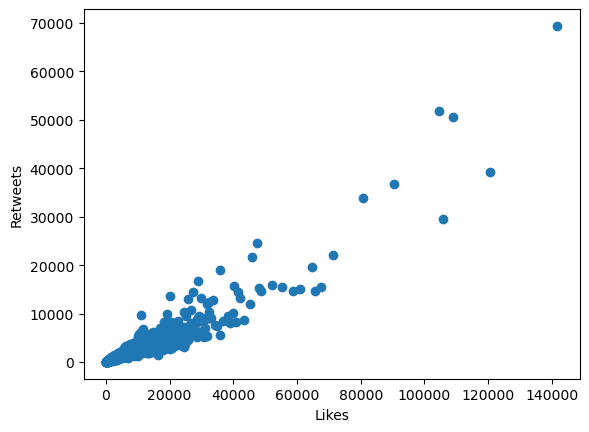

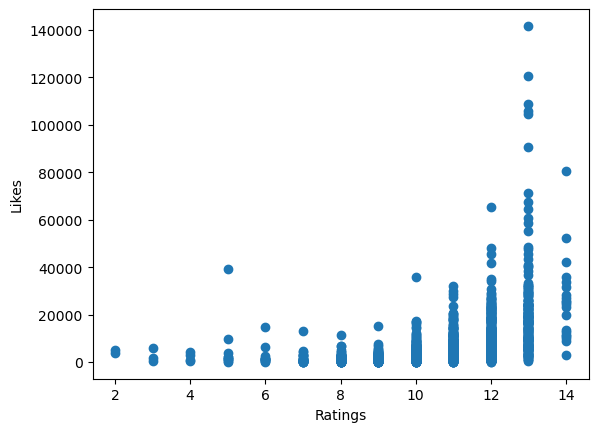

In [82]:
plt.figure(1)
plt.scatter(data = tweet_archive_clean, x = 'favorite_count', y = 'retweet_count')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.savefig('visual2.png')
plt.show();

plt.figure(2)
plt.scatter(data = tweet_archive_clean, x = 'rating', y = 'favorite_count')
plt.xlabel('Ratings')
plt.ylabel('Likes')
plt.savefig('visual3.png')
plt.show();

### 4. Most Popular dog breeds over time

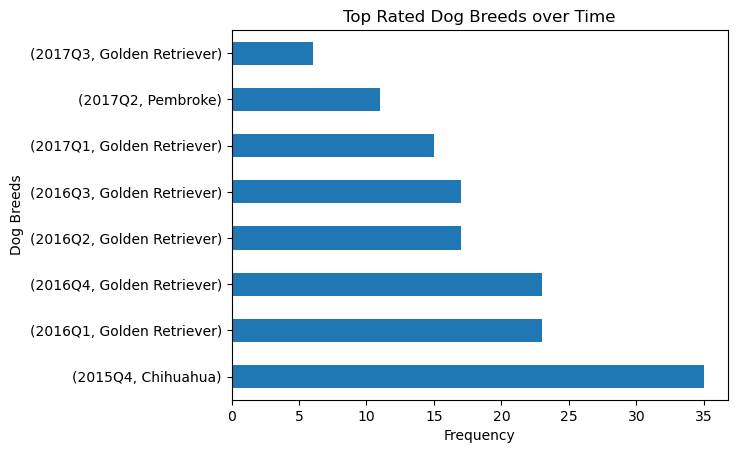

In [83]:
# Creating a quarter column from the date column for time series
tweet_archive_clean['quarter'] = tweet_archive_clean['date'].dt.to_period("Q")

top_rated = tweet_archive_clean.groupby('quarter')['p_most_conf'].value_counts()
top_rated.sort_values(ascending=False).groupby(level=0).head(1).plot(kind = 'barh')
plt.title('Top Rated Dog Breeds over Time')
plt.ylabel('Dog Breeds')
plt.xlabel('Frequency')
plt.savefig('visual4.png')
plt.show();

### 5. Dog Ratings over the years

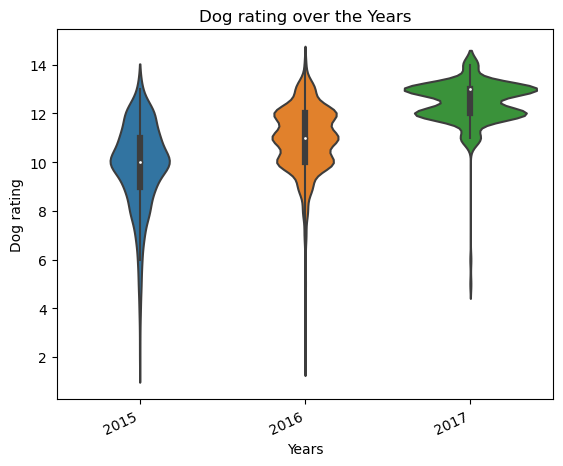

In [84]:
sns.violinplot(x = tweet_archive_clean.date.dt.year, y = tweet_archive_clean.rating)
plt.title('Dog rating over the Years')
plt.ylabel('Dog rating')
plt.xlabel('Years')
plt.xticks(rotation = 25, ha = 'right')
plt.savefig('visual5.png')
plt.show();

### 6. Distriibution of Likes based on Dog Stage

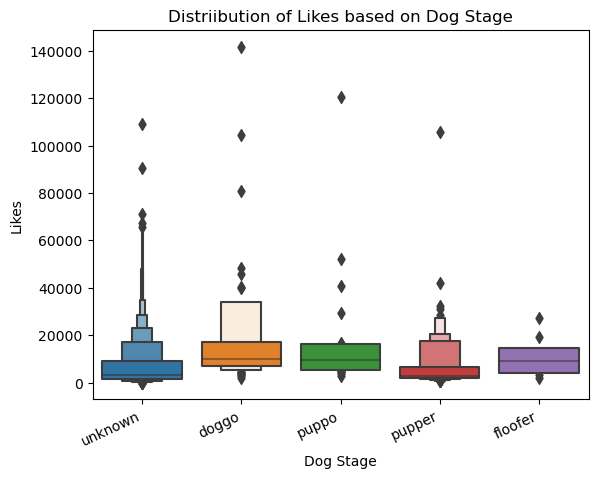

In [85]:
sns.boxenplot(data = tweet_archive_clean, x = 'dog_stage', y = 'favorite_count')
plt.title('Distriibution of Likes based on Dog Stage')
plt.ylabel('Likes')
plt.xlabel('Dog Stage')
plt.xticks(rotation = 25, ha = 'right')
plt.savefig('visual6.png')
plt.show();

### Insights:
1. The most featured dog breed in tweets is the **Golden Retriever**

2. The dog breed with the most tweet engagements on average is **Saluki**

3. There seems to be a fairly positive correlation between likes and retweets and also between ratings and likes

4. The most popular dog breed over time is the **Golden Retriever** except in **2015Q4** and in **2017Q2** when **Chihuahua** and **pembroke** were the most popular respectively

5. The dog rating was between **6** and **14** with a lower spike in **2015** and **2016**. However, this distribution of rating tend to expand and increase in **2017**

6. **Doggo** is the dog stage of dogs that seems to be liked the most while **Floofer** are few and least liked

### References:

> [Skip cell while running all](https://stackoverflow.com/questions/60556163/jupyter-notebook-how-to-leave-one-cell-out-while-run-all)
>
> [Using the combine_first function](https://stackoverflow.com/questions/59133159/pandas-select-preferred-value-from-one-of-two-columns-to-make-a-new-column)
>
> [Matching row index](https://www.geeksforgeeks.org/python-pandas-dataframe-at/)
>
> [Extracting substring from a string](https://stackoverflow.com/questions/66409210/how-to-extract-word-after-a-substring-in-python)
>
> [Extract using regular expressions](https://www.w3resource.com/pandas/series/series-str-extract.php)
>
> [Specific RegEx](https://stackoverflow.com/questions/2403122/regular-expression-to-extract-text-between-square-brackets)
>
> [Using the isin function](https://stackoverflow.com/questions/53710678/pandas-extract-rows-of-a-df-when-a-column-value-matches-with-a-column-value-of)